<a href="https://colab.research.google.com/github/Siwon-Kim/CodeBlue-AI-model/blob/main/%EB%AC%B8%EC%9E%A5%ED%95%99%EC%8A%B5_%EB%A6%AC%ED%8F%AC%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN 순환 신경망 모델을 통한 증상보고서 문장 데이터셋 학습

### 트러블슈팅 과정
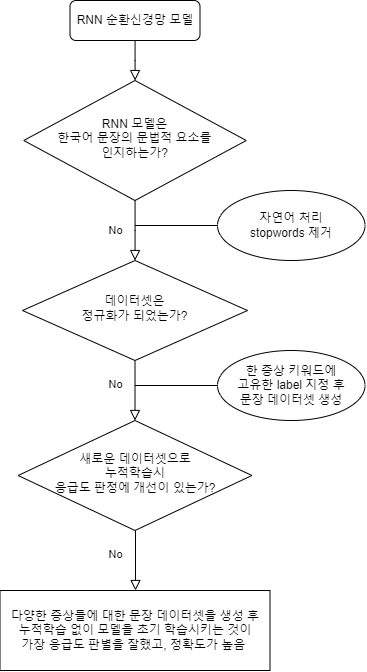

## 1단계: 정규화된 데이터셋 ❌ & 한국어 자연어 전처리 ❌

### 데이터셋 & 하이퍼파라미터
- 데이터셋양: 747문장,
- 에폭: 100회
- LSTM: 64
- Dropout: 0.5

**=> 테스트 정확도 0.4666**

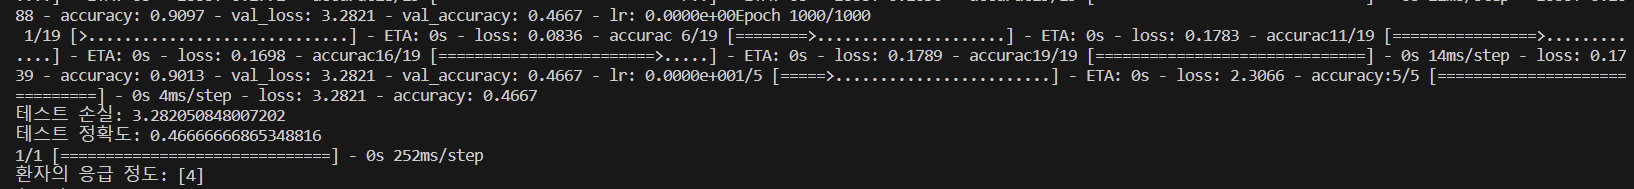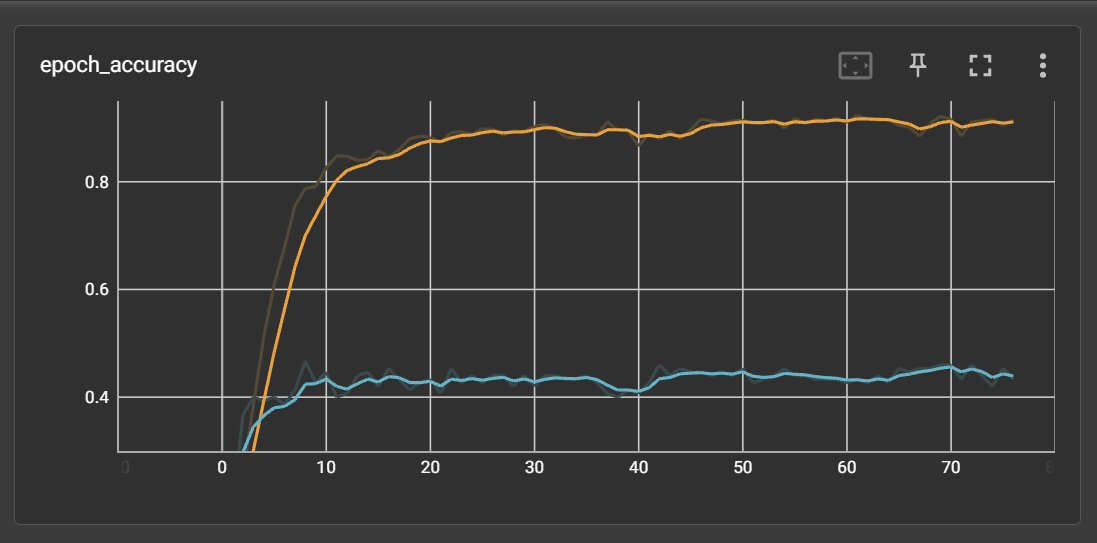

## 2단계: 정규화된 데이터셋 ❌ & 한국어 자연어 전처리 ⭕

### 데이터셋 & 하이퍼파라미터
- 데이터셋양: 747문장,
- 에폭: 100회
- LSTM: 64
- Dropout: 0.5

**=> 테스트 정확도 0.5600** </br>
=> 자연어 전처리 적용 전보다는 정확도의 개선이 있었습니다. </br>
=> 그러나, 여전히 정확도가 매우 낮았습니다.

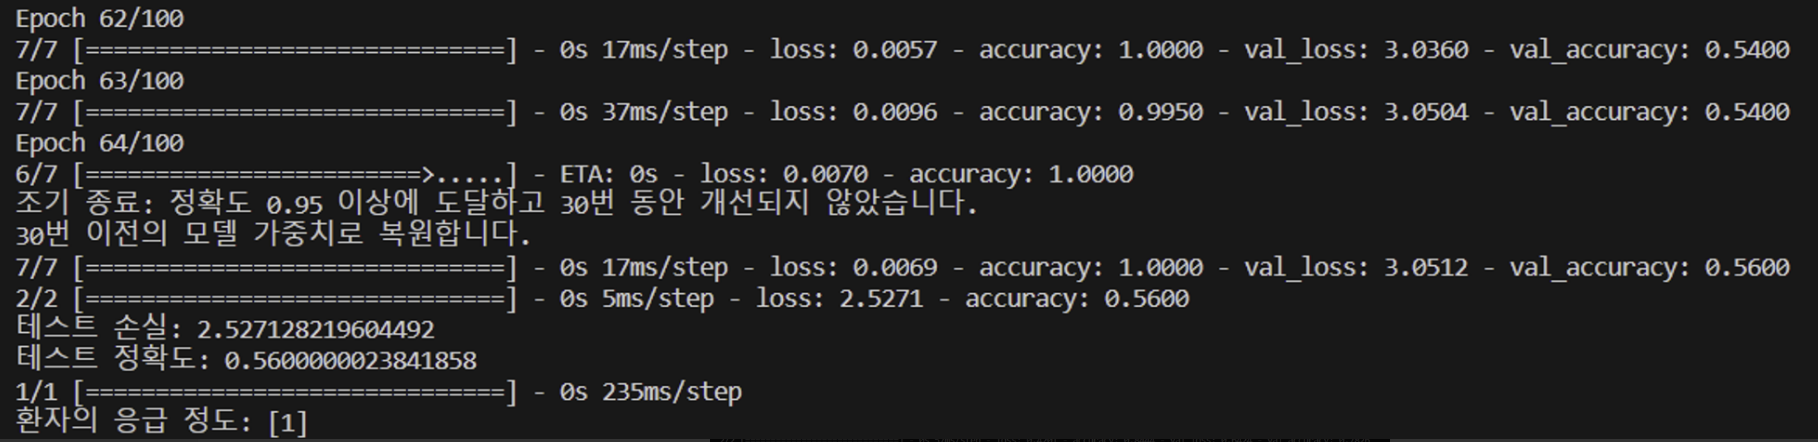

## 3단계: 정규화된 데이터셋 ⭕ & 한국어 자연어 전처리 ⭕

### 데이터셋 & 하이퍼파라미터
- 데이터셋양: 963문장,
- 에폭: 100회
- LSTM: 64
- Dropout: 0.3

### 정규화 문장 데이터셋 생성
다음 기준으로 각 증상별로 label을 특정하여, 증상과 관련된 다양한 상황에 대한 문장을 생성하여 학습을 진행하였습니다. </br>

> 1등급 → 심장마비, 무호흡, 호흡곤란, 쇼크, 무의식, 경련중, 척추골절 </br>
2등급 → 혈역학적 장애, 패혈증, 심근경색, 뇌출혈+뇌경색, 심인성 흉통 </br>
3등급 → 출혈성 질환, 절단, 비정상 맥박수/맥박압, 급성발병 청각손실, 흑색변 + 출혈을 동반한 설사 + 탈수  </br>
4등급 → 요로감염, 소변 배출장애+핍뇨증 , 국소성 염증, 생리문제, 만성 쇠약, 유해물질 흡입(경증) </br>
5등급 → 감기, 장염, 설사, 열상(경증 상처, 타박상, 화상 등등), 부종, 직장내 이물질

**=> 테스트 정확도 0.9323** </br>
=> 정규화된 데이터셋으로 학습을 진행하기 정확도가 90% 이상에 도달한 것을 확인하였습니다. </br>
=> 누적 학습을 통해 더 많은 증상 문장을 추가하였을 때 정확도가 오르고 응급도 판정이 용이한지 파악하는 과정이 필요하였습니다.

![](https://velog.velcdn.com/images/c1madang/post/536dda9f-74ca-4dd5-a945-899c4a37dcf5/image.png)

![](https://velog.velcdn.com/images/c1madang/post/2618734e-4f07-4a2c-ad67-5176f7258710/image.png)

![](https://velog.velcdn.com/images/c1madang/post/12012941-5137-4a6a-87d7-11f528fefcc6/image.png)

## 4단계: 정규화된 데이터셋 ⭕ & 한국어 자연어 전처리 ⭕ & 누적학습 ⭕

### 데이터셋 & 하이퍼파라미터
- 데이터셋양: 초기 963문장 + 추가 860문장
- 에폭: 100회
- LSTM: 64
- Dropout: 0.3

### 누적 학습
1차로 900여개의 문장 데이터셋으로 학습을 시킨 모델에 900문장 + 800문장을 합쳐서 누적 학습을 진행하였습니다.

**=> 테스트 정확도 0.9501** </br>
=> 정확도가 기존 한번만 훈련한 모델에 비해 0.02만큼 증가한 것을 확인하였습니다. </br>
=> 그러나, 응급도 판정에 있어서 약간의 오판정이 있음을 확인하였습니다.

![](https://velog.velcdn.com/images/c1madang/post/daf7a6e0-13a7-4ed8-9b8f-b201d15e39c9/image.png)

![](https://velog.velcdn.com/images/c1madang/post/6bdb5016-86a6-4022-9682-bacc9c0a96bf/image.png)

![](https://velog.velcdn.com/images/c1madang/post/23c7308c-d174-4e87-8bd9-76a0ff66855b/image.png)

## 5단계: 정규화된 데이터셋 ⭕ & 한국어 자연어 전처리 ⭕ & 누적학습 ❌

### 데이터셋 & 하이퍼파라미터
- 데이터셋양: 1823문장
- 에폭: 100회
- LSTM: 64
- Dropout: 0.3

**=> 테스트 정확도 0.9775** </br>
=> 총 18000여개의 문장으로 새로운 모델에 학습을 진행하였습니다. </br>
=> 정확도가 누적학습을 한 모델보다 높았고 응급도도 더 잘 판단하였습니다.

![](https://velog.velcdn.com/images/c1madang/post/daf7a6e0-13a7-4ed8-9b8f-b201d15e39c9/image.png)

![](https://velog.velcdn.com/images/c1madang/post/6bdb5016-86a6-4022-9682-bacc9c0a96bf/image.png)

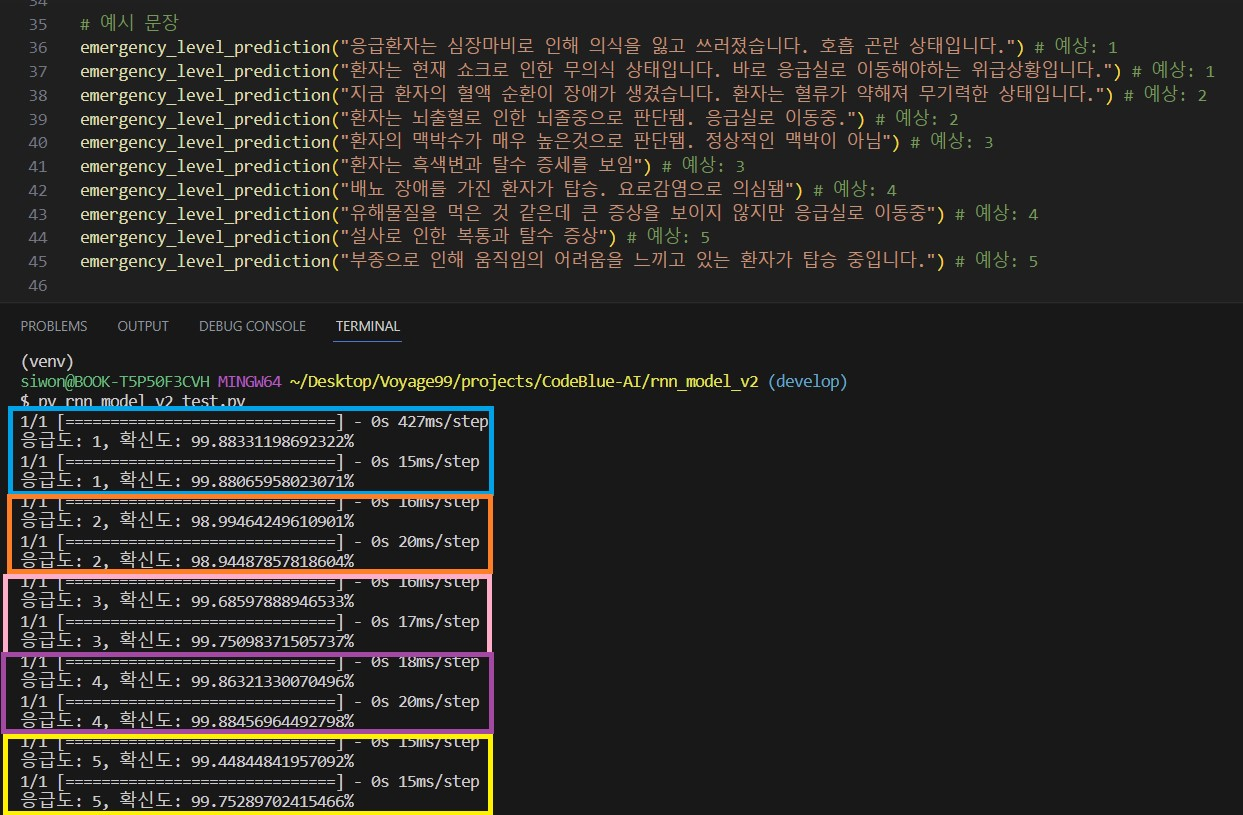

# 최종 RNN 구현 코드

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import random, pickle, re
from konlpy.tag import Okt
from dataset import data

## 데이터 전처리

In [ ]:
# 데이터 섞기
random.shuffle(data)

# duplicated data 제거
seen_values = set()
data = [item for item in data if item[0] not in seen_values and not seen_values.add(item[0])]

# 데이터 분리
symptoms_before_tuning, labels = zip(*data)
print("TOTAL_DATASET: ", len(symptoms_before_tuning))

## 토큰화

In [ ]:
stopwords = [',','.','의','로','을','가','이','은','들','는','성','좀','잘','걍','과','고','도','되','되어','되다','를','으로','자','에','와','한','합니다','니다','하다','임','음','환자','응급','상황','상태','증상','증세','구조','구급차','구급','응급환자','구급대','구급대원','구급대원들']
okt = Okt()

# 토크나이저 저장 경로
tokenizer_path = 'tokenizer.pkl'

# stopword 제거, 토큰화
symptoms = []
for sentence in symptoms_before_tuning:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    symptoms.append(stopwords_removed_sentence)

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms)
encoded_symptoms = tokenizer.texts_to_sequences(symptoms)
word_index = tokenizer.word_index
num_words = len(word_index) + 1

# 토크나이저 저장
with open(tokenizer_path, 'wb') as f:
    pickle.dump(tokenizer, f)

## 패딩

In [ ]:
max_length = max(len(seq) for seq in encoded_symptoms)
padded_symptoms = pad_sequences(encoded_symptoms, maxlen=max_length, padding='post')
print("MAX_LEN: ", max_length)
with open("max_length.txt", 'wb') as f:
    f.write(str(max_length).encode())

## 응급 정도 레이블 전처리

In [ ]:
num_classes = 5
encoded_labels = to_categorical(np.array(labels) - 1, num_classes=num_classes)

## 학습 데이터와 테스트 데이터로 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_symptoms, encoded_labels, test_size=0.2, random_state=42)

## RNN 모델 구성 (100차원, 활성화 함수:softmax - 다중 클래스 분류에 사용)


In [ ]:
embedding_dim = 100
hidden_unit = 128 # hidden layer
model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=max_length))
model.add(LSTM(hidden_unit))
model.add(Dropout(0.3)) # dropout - 과적합 방지
model.add(Dense(num_classes, activation='softmax'))

## 학습률 스케줄링 함수 정의 (100번동안은 학습률 유지 후 0.1씩 감소 -> 초기학습은 빠르게)


In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 1000:
        return lr
    else:
        return lr * 0.1 # learning rate

# 학습률 스케줄링 콜백 정의
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

## 조기종료 함수 정의


In [ ]:
class CustomEarlyStopping(Callback):
    def __init__(self, accuracy_threshold=0.95, patience=30):
        super(CustomEarlyStopping, self).__init__()
        self.accuracy_threshold = accuracy_threshold
        self.patience = patience
        self.wait = 0  # 개선 없는 횟수 세기
        self.stopped_epoch = 0  # 종료 에폭 번호
        self.best_weights = None  # 최적 가중치 저장
        self.best_val_loss = float('inf')  # 최적의 검증 손실 초기화

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('accuracy')
        current_val_loss = logs.get('val_loss')

        if current_accuracy >= self.accuracy_threshold and self.wait >= self.patience:
            self.stopped_epoch = epoch
            self.model.stop_training = True
            print(f"\n조기 종료: 정확도 {self.accuracy_threshold} 이상에 도달하고 {self.patience}번 동안 검증 손실이 개선되지 않았습니다.")
            print(f"{self.patience}번 이전의 모델 가중치로 복원합니다.")
            self.model.set_weights(self.best_weights)

        if current_val_loss is not None:
            if current_val_loss < self.best_val_loss:
                self.best_weights = self.model.get_weights()
                self.best_val_loss = current_val_loss
                self.wait = 0
            else:
                self.wait += 1

# 조기 종료 콜백 정의 (30번동안 검증손실이 개선되지 않으면 조기종료)
early_stopping_callback = CustomEarlyStopping(accuracy_threshold=0.95, patience=30)

## 모델 컴파일 (알고리즘:adam, 손실함수:categorical_crossentropy, 평가지표:accuracy)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 모델 학습 (반복횟수:100, 한번에 처리할 데이터 샘플:64)

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), # epochs: 조정 대상
          callbacks=[early_stopping_callback, lr_scheduler_callback], verbose=1) # mc 추가

# 모델 성능 평가

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("테스트 손실:", loss)
print("테스트 정확도:", accuracy)

## 문장 예측

In [ ]:
def emergency_level_prediction(sample_sentence):
    # 샘플 문장 전처리
    sample_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', sample_sentence)
    sample_sentence = okt.morphs(sample_sentence, stem=True) # 토큰화
    sample_sentence = [word for word in sample_sentence if not word in stopwords] # 불용어 제거
    # 샘플 문장을 토큰화하고 패딩
    encoded_sample = tokenizer.texts_to_sequences([sample_sentence])
    padded_sample = pad_sequences(encoded_sample, maxlen=max_length, padding='post')
    # 샘플 문장 응급도 예상
    prediction = model.predict(padded_sample)
    emergency_level = np.argmax(prediction, axis=1) + 1
    confidence = prediction[0][emergency_level[0]-1] # 각 클래스의 확률 중에서 선택된 클래스의 확률
    print(f"응급도: {emergency_level[0]}, 확신도: {confidence * 100.0}%")


# 예시 문장
emergency_level_prediction("응급환자는 심장마비로 인해 의식을 잃고 쓰러졌습니다. 호흡 곤란 상태입니다.") # 예상: 1
emergency_level_prediction("환자는 현재 쇼크로 인한 무의식 상태입니다. 바로 응급실로 이동해야하는 위급상황입니다.") # 예상: 1
emergency_level_prediction("지금 환자의 혈액 순환이 장애가 생겼습니다. 환자는 혈류가 약해져 무기력한 상태입니다.") # 예상: 2
emergency_level_prediction("환자는 뇌출혈로 인한 뇌졸중으로 판단됌. 응급실로 이동중.") # 예상: 2
emergency_level_prediction("환자의 맥박수가 매우 높은것으로 판단됌. 정상적인 맥박이 아님") # 예상: 3
emergency_level_prediction("환자는 흑색변과 탈수 증세를 보임") # 예상: 3
emergency_level_prediction("배뇨 장애를 가진 환자가 탑승. 요로감염으로 의심됌") # 예상: 4
emergency_level_prediction("유해물질을 먹은 것 같은데 큰 증상을 보이지 않지만 응급실로 이동중") # 예상: 4
emergency_level_prediction("설사로 인한 복통과 탈수 증상") # 예상: 5
emergency_level_prediction("부종으로 인해 움직임의 어려움을 느끼고 있는 환자가 탑승 중입니다.") # 예상: 5

## 모델 저장

In [ ]:
model.save('rnn_model_v2.h5')